<h1>Extracting Stock Data Using a Python Library</h1>


<p>I will hypothetically work as a data analyst for a hedge fund; my job is to determine any suspicious stock activity. I will extract stock data using a Python library. I will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe.</p>


In [1]:
# !pip install yfinance==0.1.67
#!pip install pandas==1.3.3

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Using the yfinance Library to Extract Stock Data


I will use the Ticker module and create an object that will allow me to access functions to extract data. 

In [3]:
tesla = yf.Ticker("TSLA")

In [4]:
tesla_info=tesla.info
tesla_info

{'zip': '78725',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 99290,
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limited warrantie

I can get the any values from this dictionary using the key:


In [5]:
tesla_info['averageVolume']

81281742

### Extracting Share Price


I will use the history() method to get the share price of the stock over a certain period of time. 

Specifing the period parameter I can set how far back from the present to get data (the options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max)


Then the format that the data is returned in is a Pandas DataFrame. 

In [6]:
tesla_data = tesla.history(period="max")
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0
...,...,...,...,...,...,...,...
2022-12-02 00:00:00-05:00,191.779999,196.250000,191.110001,194.860001,73533400,0,0.0
2022-12-05 00:00:00-05:00,189.440002,191.270004,180.550003,182.449997,93122700,0,0.0
2022-12-06 00:00:00-05:00,181.220001,183.649994,175.330002,179.820007,92150800,0,0.0


I can also set a different period:

In [7]:
tesla_data_1month = tesla.history(period="1mo")
tesla_data_1month.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-09 00:00:00-05:00,190.779999,195.889999,177.119995,177.589996,127062700,0,0
2022-11-10 00:00:00-05:00,189.899994,191.000000,180.029999,190.720001,132703000,0,0
2022-11-11 00:00:00-05:00,186.000000,196.520004,182.589996,195.970001,114403600,0,0
2022-11-14 00:00:00-05:00,192.770004,195.729996,186.339996,190.949997,92226600,0,0
2022-11-15 00:00:00-05:00,195.880005,200.820007,192.059998,194.419998,91293800,0,0


I will go on with the max period:


In [8]:
tesla_data.reset_index(inplace=True)

I will plot the Open price against the Date:


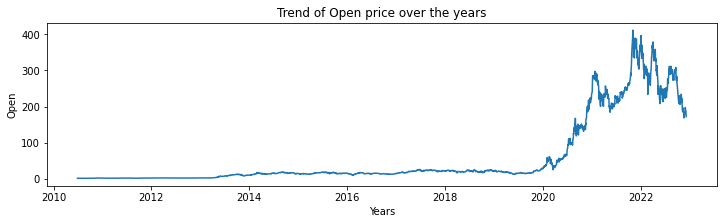

In [9]:
fig, axes = plt.subplots(figsize=(12,3)) 

# Now use the axes object to add stuff to plot
axes.plot(tesla_data["Date"], tesla_data["Open"])
axes.set_xlabel('Years')
axes.set_ylabel('Open')
axes.set_title('Trend of Open price over the years');


### Extracting CashFlow


In [14]:
tesla_cashflow=tesla.cashflow.T
tesla_cashflow

,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Change To Operating Activities,Issuance Of Stock,Net Income,Change In Cash,Effect Of Exchange Rate,Total Cash From Operating Activities,Depreciation,Other Cashflows From Investing Activities,Change To Inventory,Change To Account Receivables,Other Cashflows From Financing Activities,Change To Netincome,Capital Expenditures
,,,,,,,,,,,,,,,,,,
2021-12-31,-132000000.0,5.371000e+09,-7.868000e+09,-5.732000e+09,-5.203000e+09,-3.014000e+09,7.070000e+08,5.519000e+09,-1.757000e+09,-183000000.0,1.149700e+10,2.911000e+09,-1.222000e+09,-1.709000e+09,-130000000.0,-178000000.0,2.549000e+09,-6.514000e+09
2020-12-31,-132000000.0,2.423000e+09,-3.132000e+09,-2.488000e+09,9.973000e+09,-1.165000e+09,1.268600e+10,7.210000e+08,1.311800e+10,334000000.0,5.943000e+09,2.322000e+09,1.230000e+08,-4.220000e+08,-652000000.0,-225000000.0,2.716000e+09,-3.232000e+09
2019-12-31,-132000000.0,1.447000e+09,-1.436000e+09,7.980000e+08,1.529000e+09,-1.000000e+09,1.111000e+09,-8.620000e+08,2.506000e+09,8000000.0,2.405000e+09,2.092000e+09,4.600000e+07,-4.290000e+08,-367000000.0,-380000000.0,1.524000e+09,-1.432000e+09
2018-12-31,-132000000.0,2.203000e+09,-2.337000e+09,8.900000e+07,5.740000e+08,-6.250000e+08,2.960000e+08,-9.760000e+08,3.120000e+08,-23000000.0,2.098000e+09,1.888000e+09,4.600000e+07,-1.023000e+09,-497000000.0,189000000.0,9.690000e+08,-2.319000e+09


I will plot the dividends overtime:


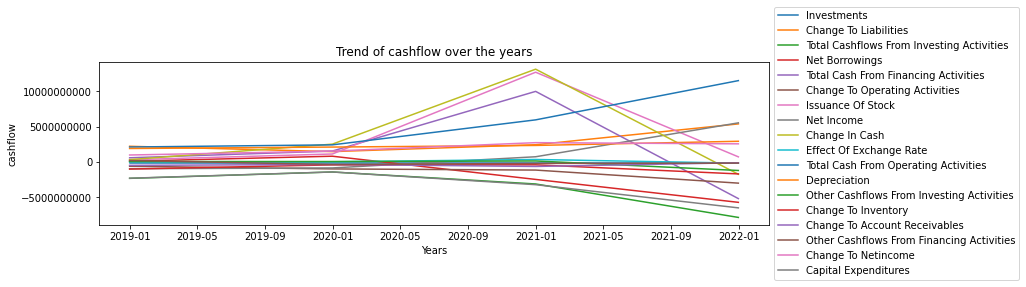

In [15]:
fig, axes = plt.subplots(figsize=(12,3)) 


axes.plot(tesla_cashflow)
axes.set_xlabel('Years')
axes.set_ylabel('cashflow')
axes.set_title('Trend of cashflow over the years');
axes.legend(tesla_cashflow, loc='center left', bbox_to_anchor=(1.0, 0.5)) 
axes.ticklabel_format(style='plain', axis='y')